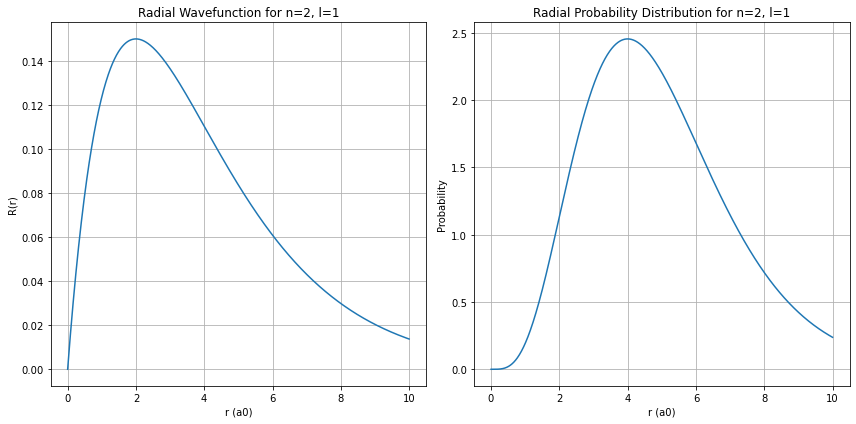

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from math import factorial, sqrt

# Constants
a0 = 1  # Bohr radius, normalized to 1

# Quantum numbers
n = 2  # Principal quantum number
l = 1  # Azimuthal quantum number

# Radial wavefunction
def radial_wavefunction(n, l, r):
    rho = 2 * r / (n * a0)
    L = genlaguerre(n - l - 1, 2 * l + 1)
    normalization = sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    R = normalization * rho**l * np.exp(-rho / 2) * L(rho)
    return R

# Radial distance
r = np.linspace(0, 10 * a0, 1000)

# Calculate radial wavefunction
R = radial_wavefunction(n, l, r)

# Plot radial wavefunction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(r, R)
plt.xlabel('r (a0)')
plt.ylabel('R(r)')
plt.title(f'Radial Wavefunction for n={n}, l={l}')
plt.grid(True)

# Plot radial probability distribution
plt.subplot(1, 2, 2)
plt.plot(r, R**2 * 4*np.pi*r**2)
plt.xlabel('r (a0)')
plt.ylabel('Probability')
plt.title(f'Radial Probability Distribution for n={n}, l={l}')
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
from math import factorial, sqrt
from ipywidgets import interactive, IntSlider

a0 = 1  # Bohr radius, normalized to 1

def radial_wavefunction(n, l, r):
    rho = 2 * r / (n * a0)
    L = genlaguerre(n - l - 1, 2 * l + 1)
    normalization = sqrt((2 / (n * a0))**3 * factorial(n - l - 1) / (2 * n * factorial(n + l)))
    R = normalization * rho**l * np.exp(-rho / 2) * L(rho)
    return R

def plot_wavefunctions(n, l):
    r = np.linspace(0, 10 * a0, 1000)
    R = radial_wavefunction(n, l, r)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(r, R)
    plt.xlabel('r (a0)')
    plt.ylabel('R(r)')
    plt.title(f'Radial Wavefunction for n={n}, l={l}')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(r, R**2 * r**2)
    plt.xlabel('r (a0)')
    plt.ylabel('Probability')
    plt.title(f'Radial Probability Distribution for n={n}, l={l}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

n_slider = IntSlider(min=1, max=5, value=1, description='n')
l_slider = IntSlider(min=0, max=n_slider.value - 1, value=0, description='l')

def update_l_range(*args):
    l_slider.max = n_slider.value - 1

n_slider.observe(update_l_range, 'value')

interactive_plot = interactive(plot_wavefunctions, n=n_slider, l=l_slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


/Users/hassan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


interactive(children=(IntSlider(value=1, description='n', max=5, min=1), IntSlider(value=0, description='l', m…